# Bank Customer Churn Logistic Regression

## Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import the dataset

In [2]:
dataset = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


## Update missing values & Removing columns/rows

In [5]:
dataset = dataset.drop(['customer_id','country'], axis = 1)

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


## Splitting the data into dependent and independent variables

In [8]:
# Outcome is what we want to predict
X = dataset.drop('churn', axis = 1)
y = dataset[['churn']]

In [9]:
X.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,Female,42,2,0.00,1,1,1,101348.88
1,608,Female,41,1,83807.86,1,0,1,112542.58
2,502,Female,42,8,159660.80,3,1,0,113931.57
3,699,Female,39,1,0.00,2,0,0,93826.63
4,850,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


## Handling categorical data 

In [11]:
X.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

In [12]:
X = pd.get_dummies(dataset[['credit_score','gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary']],
                  drop_first = True)

In [13]:
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,0
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


## Splitting the dataset into training and test set 80/20

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Training the Logistic Regression model on the Training set

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Confusion Matrix

In [16]:
y_pred = classifier.predict(X_test.values)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1573   34]
 [ 365   28]]


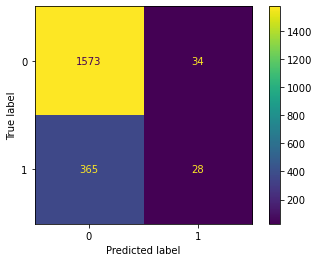

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

## Accuracy Score 

In [19]:
accuracy_score(y_test, y_pred)

0.8005

## R-Square, MSE and RMSE 

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f"r-square: {r2_score(y_test, y_pred): 0.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred): 0.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)): 0.2f}")

r-square: -0.26
MSE:  0.20
RMSE:  0.45


## Classification Report 

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



## Splitting the dataset into training and test set 70/30

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

## Training the Logistic Regression model on the Training set

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Confusion Matrix

In [24]:
y_pred = classifier.predict(X_test.values)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2354   62]
 [ 536   48]]


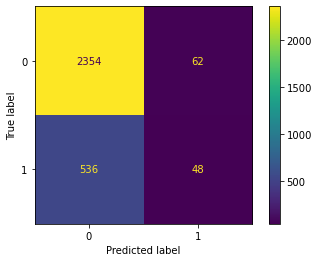

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

## Accuracy Score 

In [27]:
accuracy_score(y_test, y_pred)

0.8006666666666666

## R-Square, MSE, RMSE

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f"r-square: {r2_score(y_test, y_pred): 0.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred): 0.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)): 0.2f}")

r-square: -0.27
MSE:  0.20
RMSE:  0.45


## Classification Report 

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



## Splitting the dataset into training and test set 90/10

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 42)

## Training the Logistic Regression model on the Training set

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Confusion Matrix

In [32]:
y_pred = classifier.predict(X_test.values)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[792  17]
 [177  14]]


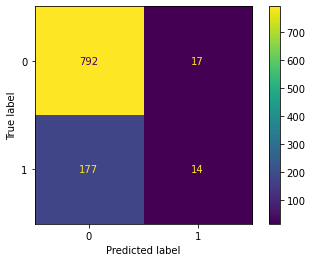

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

## Accuracy Score 

In [35]:
accuracy_score(y_test, y_pred)

0.806

## R-Square, MSE, RMSE 

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f"r-square: {r2_score(y_test, y_pred): 0.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred): 0.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)): 0.2f}")

r-square: -0.26
MSE:  0.19
RMSE:  0.44


## Classification Report 

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       809
           1       0.45      0.07      0.13       191

    accuracy                           0.81      1000
   macro avg       0.63      0.53      0.51      1000
weighted avg       0.75      0.81      0.74      1000

